L'idea del progetto è quella di valutare i dataset ed avere una visione di ognuno, dopo di che confrontarli e capire se esiste correlazione tra i picchi degli inquinanti presenti nell'aria e i ricoveri ospedalieri filtrando i ricoveri per motivi respiratori.
Il dataset inquinanti è stato recuperato dal sito  https://dati.comune.milano.it/dataset/ds406-rilevazione-qualita-aria-2025
il dataset ricoveri avrei dovuto estrapolare dai dati ufficiali delle Schede di Dimissione Ospedaliera (SDO) in pdf, pubblicati annualmente dal Ministero della Salute (https://www.quotidianosanita.it/allegati/allegato1669112221.pdf) ma non contenengono dei dataset quindi ne ho generato uno che potesse fare al caso di studio.

In [92]:
#carico le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
df_inquinanti = pd.read_csv('qaria_gennaio_marzo_2025.csv', sep=';')
df_limiti_inquinanti = pd.read_csv('limiti_inquinanti_italia.csv', sep=',')

In [94]:
df_inquinanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           1080 non-null   object 
 1   zona           1080 non-null   object 
 2   nome stazione  1080 non-null   object 
 3   inquinante     1080 non-null   object 
 4   valore         1076 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.3+ KB


In [95]:
df_inquinanti['data'] = pd.to_datetime(df_inquinanti['data'], format='%d/%m/%Y')


In [96]:
df_inquinanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           1080 non-null   datetime64[ns]
 1   zona           1080 non-null   object        
 2   nome stazione  1080 non-null   object        
 3   inquinante     1080 non-null   object        
 4   valore         1076 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 42.3+ KB


non sono molto convinto se object viene gestito bene come stringhe quindi effettuo una conversione

In [97]:
df_inquinanti['zona'] = df_inquinanti['zona'].astype(str)
df_inquinanti['nome stazione'] = df_inquinanti['nome stazione'].astype(str)
df_inquinanti['inquinante'] = df_inquinanti['inquinante'].astype(str)


In [98]:
df_inquinanti.describe(include='all')

,data,zona,nome stazione,inquinante,valore
count,1080,1080,1080,1080,1076.000000
unique,NaN,4,5,7,NaN
top,NaN,Nord,via Pascal,NO2,NaN
freq,NaN,324,324,270,NaN
mean,2025-02-18 11:06:40,NaN,NaN,NaN,31.645539
min,2025-01-07 00:00:00,NaN,NaN,NaN,0.000000
25%,2025-01-24 00:00:00,NaN,NaN,NaN,2.500000
50%,2025-02-20 12:00:00,NaN,NaN,NaN,26.000000
75%,2025-03-12 00:00:00,NaN,NaN,NaN,52.000000
max,2025-03-31 00:00:00,NaN,NaN,NaN,131.000000


In [99]:
df_inquinanti.head(20)

,data,zona,nome stazione,inquinante,valore
0,2025-01-07,Nord,via Pascal,C6H6,1.4
1,2025-01-07,Nord,via Pascal,NO2,28.0
2,2025-01-07,Nord,via Pascal,O3,22.0
3,2025-01-07,Nord,via Pascal,PM10,40.0
4,2025-01-07,Nord,via Pascal,PM25,26.0
5,2025-01-07,Nord,via Pascal,SO2,5.0
6,2025-01-07,Centro,viale Liguria,NO2,40.0
7,2025-01-07,Est,viale Marche,C6H6,1.5
8,2025-01-07,Est,viale Marche,CO_8h,0.9
9,2025-01-07,Est,viale Marche,NO2,35.0


Filtro il dataframe per una singola stazione, scelta come esempio, e singolo inquinante, dopo di che effettuo un plot , imposto dimensioni dell'immagine e visualizzo una griglia. Applico loc per filtrare.

<Axes: title={'center': 'PM10 in viale Marche'}, xlabel='data'>

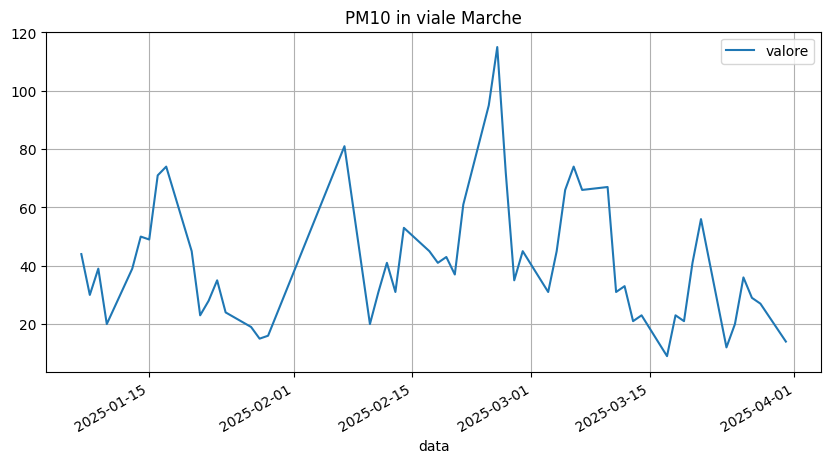

In [100]:
df_inquinanti.loc[(df_inquinanti['nome stazione'] == 'viale Marche') & (df_inquinanti['inquinante'] == 'PM10')].plot(x='data', y='valore', title='PM10 in viale Marche', figsize=(10, 5), grid=True)

Faccio una pivot table per poter avere le date sull'asse delle X, il valore medio degli inquinanti sullìasse delle Y e un grafico per ogni stazione

<Axes: title={'center': 'Media giornaliera degli inquinanti per stazione'}, xlabel='data'>

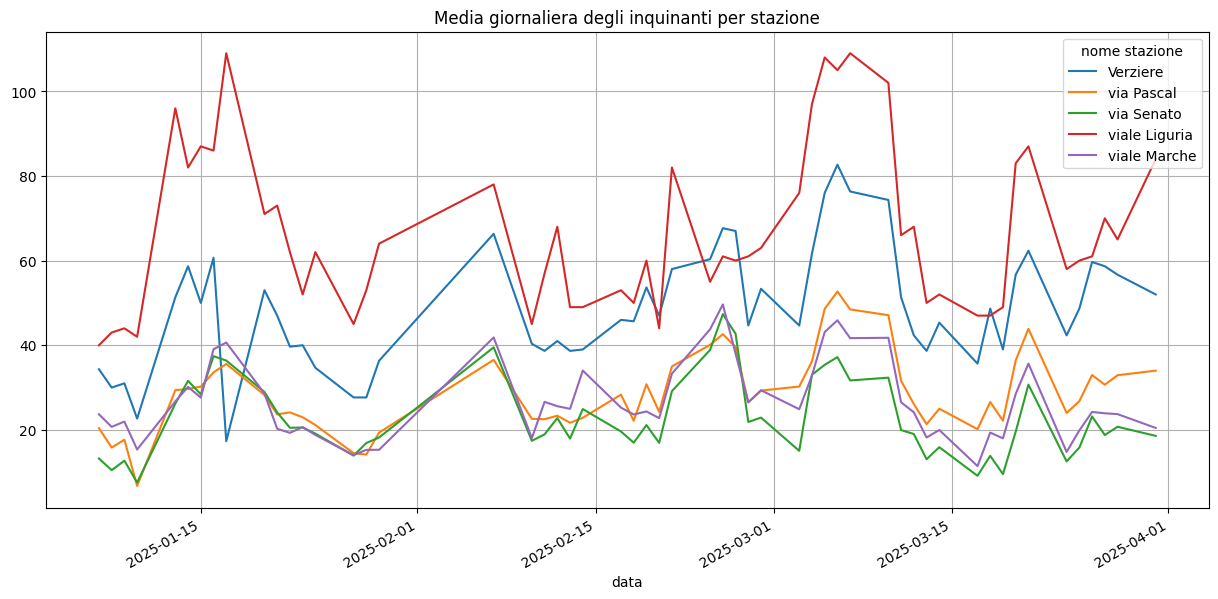

In [101]:
df_inquinanti_stazione_pv=df_inquinanti.pivot_table(index='data', columns= 'nome stazione', values='valore', aggfunc='mean')
df_inquinanti_stazione_pv.plot(title='Media giornaliera degli inquinanti per stazione', figsize=(15, 7), grid=True)

Otteniamo la media dei valori degli inquinanti per tipo

In [102]:
df_inquinante_tipo=df_inquinanti.pivot_table(index='data', columns= 'inquinante', values='valore', aggfunc='mean')

In [103]:
df_inquinante_tipo.head()

inquinante,C6H6,CO_8h,NO2,O3,PM10,PM25,SO2
data,,,,,,,
2025-01-07,1.533333,0.70,29.6,20.0,39.75,30.666667,5.0
2025-01-08,1.466667,0.80,32.2,19.0,27.50,21.333333,5.0
2025-01-09,1.600000,0.80,30.6,11.0,36.25,28.000000,6.0
2025-01-10,2.333333,0.80,25.8,3.5,17.75,15.666667,2.5
2025-01-13,2.000000,1.25,77.2,50.0,31.25,23.000000,2.5


**Ora confrontiamo anche di quanto i picchi di inquinanti hanno superato i valori massimi consentiti in Italia creando un nuovo dataframe**

In [104]:
df_merge_inquinanti = pd.merge(df_inquinanti, df_limiti_inquinanti, on='inquinante', how='left')

In [105]:
df_merge_inquinanti.head()

,data,zona,nome stazione,inquinante,valore,descrizione,valore_limite,unità
0,2025-01-07,Nord,via Pascal,C6H6,1.4,Benzene - concentrazione media annuale,5,µg/m³
1,2025-01-07,Nord,via Pascal,NO2,28.0,Biossido di azoto - concentrazione massima oraria,200,µg/m³
2,2025-01-07,Nord,via Pascal,O3,22.0,Ozono - concentrazione massima oraria (soglia ...,180,µg/m³
3,2025-01-07,Nord,via Pascal,PM10,40.0,Polveri PM10 - concentrazione media giornaliera,50,µg/m³
4,2025-01-07,Nord,via Pascal,PM25,26.0,Polveri PM2.5 - concentrazione media annuale,25,µg/m³


Aggiungo una colonna che indica la differenza del valore dell'inquinante e il valore limite 

In [106]:
df_merge_inquinanti['superamento soglia'] = df_merge_inquinanti['valore'] - df_merge_inquinanti['valore_limite']

In [107]:
df_merge_inquinanti.head()

,data,zona,nome stazione,inquinante,valore,descrizione,valore_limite,unità,superamento soglia
0,2025-01-07,Nord,via Pascal,C6H6,1.4,Benzene - concentrazione media annuale,5,µg/m³,-3.6
1,2025-01-07,Nord,via Pascal,NO2,28.0,Biossido di azoto - concentrazione massima oraria,200,µg/m³,-172.0
2,2025-01-07,Nord,via Pascal,O3,22.0,Ozono - concentrazione massima oraria (soglia ...,180,µg/m³,-158.0
3,2025-01-07,Nord,via Pascal,PM10,40.0,Polveri PM10 - concentrazione media giornaliera,50,µg/m³,-10.0
4,2025-01-07,Nord,via Pascal,PM25,26.0,Polveri PM2.5 - concentrazione media annuale,25,µg/m³,1.0


Ricaviamo un grafico dal dataframe solo degli inquinanti che hanno superato la soglia nel periodo considerato

<Axes: xlabel='data'>

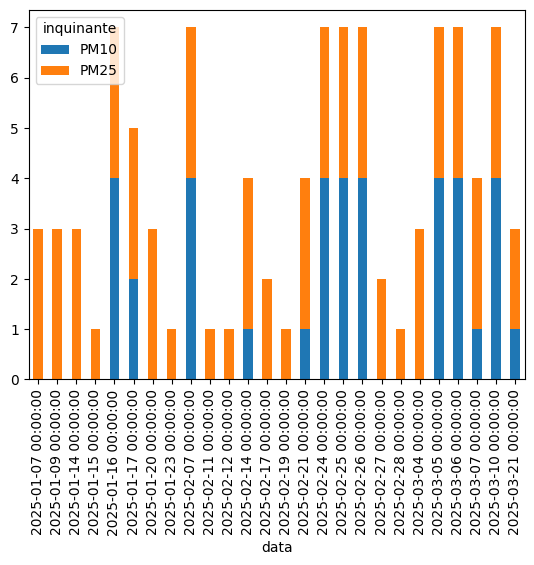

In [108]:
df_merge_inquinanti[df_merge_inquinanti['superamento soglia']>0].groupby(['data', 'inquinante']).size().unstack().plot(kind='bar', stacked=True)


Dal grafico notiamo che solo due inquinanti superano la soglia

Adesso importo un altro dataset che riguarda i ricoveri ospedalieri per poterli confrontare con i picchi degli inquinanti nelle stesse date.

In [109]:
df_ricoveri = pd.read_csv('ricoveri_ospedalieri_Milano_gennaio_marzo_2025.csv', sep=';')

In [110]:
df_ricoveri['data'] = pd.to_datetime(df_ricoveri['data'], format='%d/%m/%Y %H:%M')

In [111]:
df_ricoveri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             4200 non-null   datetime64[ns]
 1   zona             4200 non-null   object        
 2   ospedale         4200 non-null   object        
 3   diagnosi         4200 non-null   object        
 4   numero_ricoveri  4200 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 164.2+ KB


l'intento è quello di estrarre dal data frame dei ricoveri, quelli che hanno diagnosi 'problemi respiratori' e confrontando i dati, capire se c'è correlazione tra i picchi degli inquinanti e i ricoveri ospedalieri.

In [112]:
df_respiratori = df_ricoveri[df_ricoveri['diagnosi'] == 'problemi respiratori']

In [113]:
df_respiratori.head()

,data,zona,ospedale,diagnosi,numero_ricoveri
4,2025-01-07,Nord,Ospedale Niguarda,problemi respiratori,34
9,2025-01-07,Est,Policlinico di Milano,problemi respiratori,37
14,2025-01-07,Est,San Raffaele,problemi respiratori,39
19,2025-01-07,Centro,Humanitas,problemi respiratori,17
24,2025-01-07,Sud-Ovest,San Paolo,problemi respiratori,33


<center>effettuo la somma dei ricoveri giornalieri su tutti gli ospedali</center>

In [114]:
df_ricoveri_per_giorno = df_respiratori.groupby('data')['numero_ricoveri'].sum().reset_index()

In [115]:
df_ricoveri_per_giorno.head()

,data,numero_ricoveri
0,2025-01-07,309
1,2025-01-08,245
2,2025-01-09,301
3,2025-01-10,190
4,2025-01-11,12


In [116]:
#df_inquinanti_stazione_pv.head()

**Per poter confrontare i dati bisogna effettuare un merge dei due dataframe, come faremmo con un database**

# **<center>Confronto considerando la stazioni</center>**

Creo tanti grafici quanti inquinanti per le varie stazioni

Inquinante PM10

<Axes: title={'center': 'PM10 per stazione e ricoveri respiratori'}, xlabel='data'>

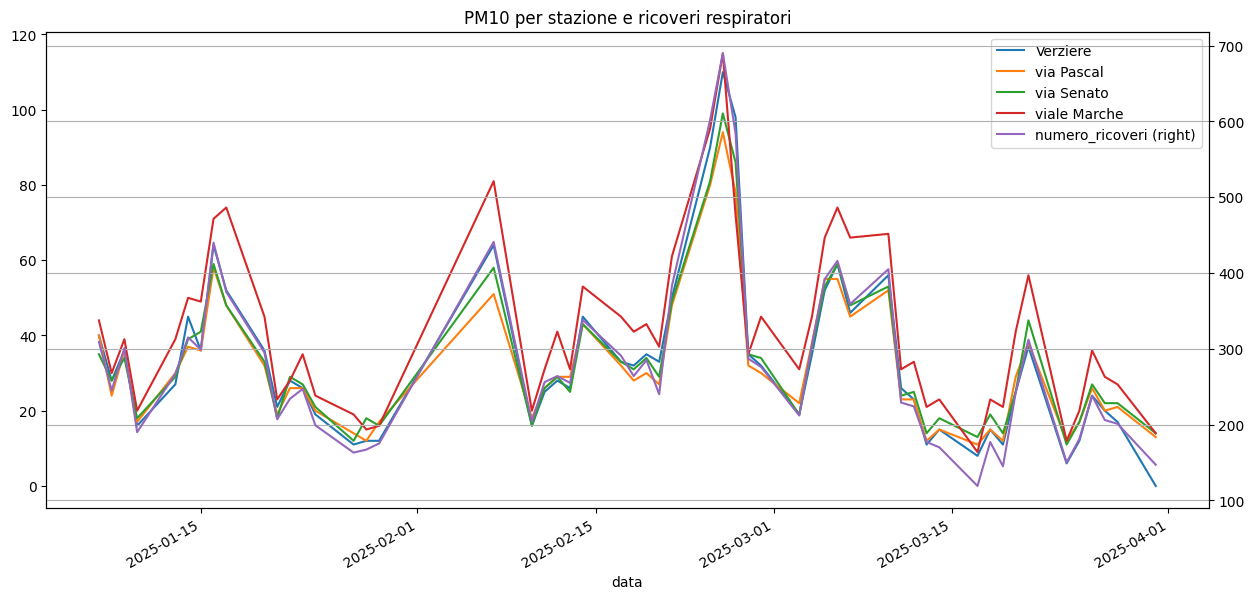

In [117]:
# Filtro solo i dati relativi a PM10
df_pm10 = df_inquinanti[df_inquinanti['inquinante'] == 'PM10']

# Creo una pivot table: date sulle righe (X), stazioni sulle colonne (Y), grafico valori medi giornalieri
df_pm10_pivot = df_pm10.pivot_table(index='data', columns='nome stazione', values='valore', aggfunc='mean')

# Effettuo il merge della pivot ottenuta e il dataframe dei ricoveri giornalieri
df_pm10_confronto = pd.merge(df_pm10_pivot.reset_index(), df_ricoveri_per_giorno, on='data', how='left')

# Plot: andamento PM10 per stazione e ricoveri
df_pm10_confronto.set_index('data').plot(
    y=list(df_pm10_pivot.columns) + ['numero_ricoveri'],
    secondary_y=['numero_ricoveri'],
    figsize=(15, 7),
    title='PM10 per stazione e ricoveri respiratori',
    grid=True
)

In [118]:
df_confronto_stazioni = pd.merge(df_inquinanti_stazione_pv.reset_index(), df_ricoveri_per_giorno, on='data', how='left')

In [119]:
df_confronto_stazioni.head()

,data,Verziere,via Pascal,via Senato,viale Liguria,viale Marche,numero_ricoveri
0,2025-01-07,34.333333,20.400000,13.24,40.0,23.68,309
1,2025-01-08,30.000000,15.833333,10.48,43.0,20.72,245
2,2025-01-09,31.000000,17.666667,12.72,44.0,21.96,301
3,2025-01-10,22.666667,6.750000,7.56,42.0,15.36,190
4,2025-01-13,51.333333,29.383333,26.20,96.0,26.74,267


<Axes: title={'center': 'Inquinanti e ricoveri respiratori'}, xlabel='data'>

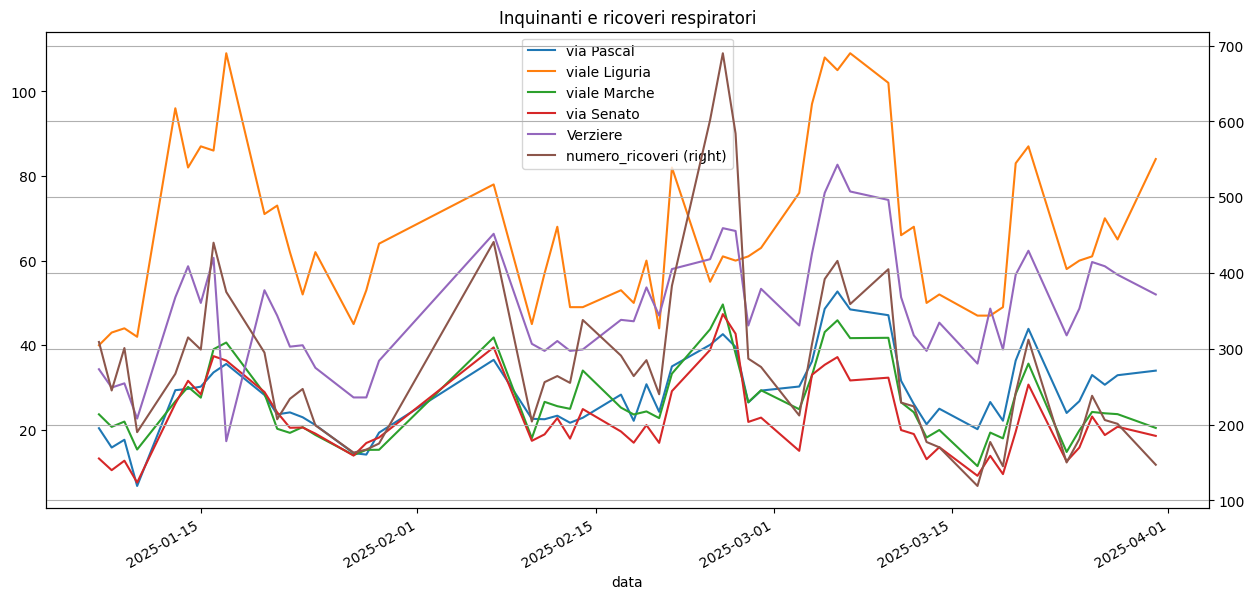

In [120]:
df_confronto_stazioni.set_index('data').plot(
    y=['via Pascal', 'viale Liguria', 'viale Marche', 'via Senato', 'Verziere', 'numero_ricoveri'],
    secondary_y=['numero_ricoveri'],
    figsize=(15, 7),
    title='Inquinanti e ricoveri respiratori',
    grid=True
)

Dal grafico si può capire che i picchi di ricovero opsedaliero per problemi respiratori coincidono con l'andamento dei picchi di inquinanti nelle stesse date

</br>

# **<center>Confronto considerando gli inquinanti</center>**

In [121]:

df_confronto_inquinanti = pd.merge(df_inquinante_tipo.reset_index(), df_ricoveri_per_giorno, on='data', how='left')


In [122]:
df_confronto_inquinanti.head()

,data,C6H6,CO_8h,NO2,O3,PM10,PM25,SO2,numero_ricoveri
0,2025-01-07,1.533333,0.70,29.6,20.0,39.75,30.666667,5.0,309
1,2025-01-08,1.466667,0.80,32.2,19.0,27.50,21.333333,5.0,245
2,2025-01-09,1.600000,0.80,30.6,11.0,36.25,28.000000,6.0,301
3,2025-01-10,2.333333,0.80,25.8,3.5,17.75,15.666667,2.5,190
4,2025-01-13,2.000000,1.25,77.2,50.0,31.25,23.000000,2.5,267


Effettuo il confronto solo con i 2 inquinanti che sono risultati superiori alla soglia limite

<Axes: title={'center': 'Inquinanti e ricoveri respiratori'}, xlabel='data'>

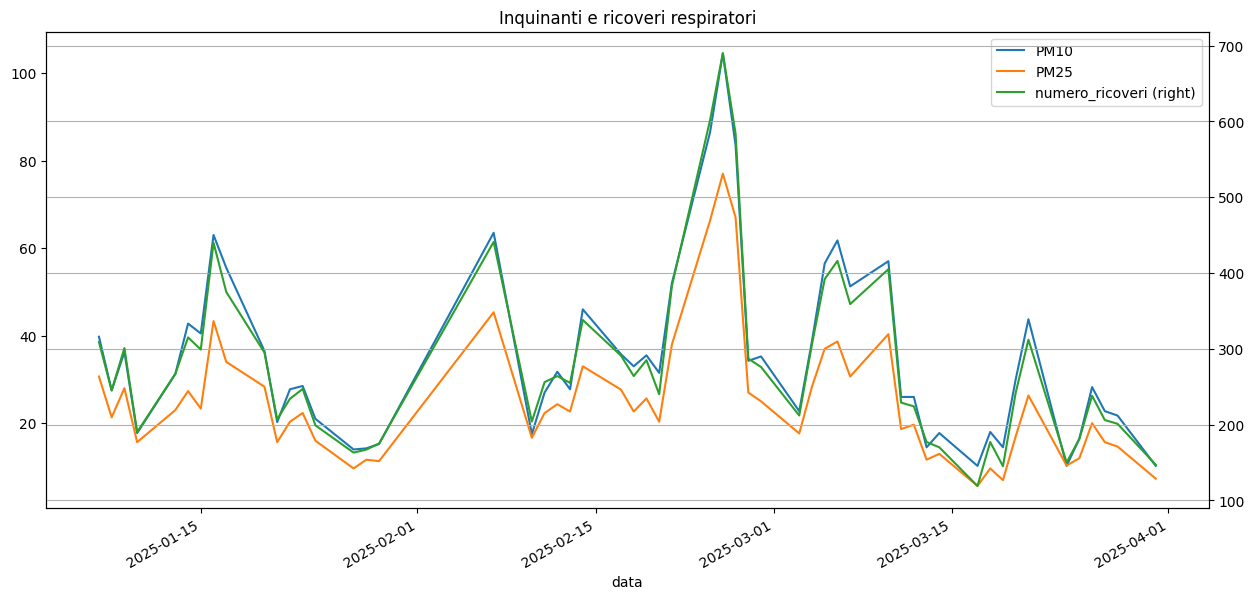

In [123]:

df_confronto_inquinanti.set_index('data').plot(
    y=['PM10', 'PM25', 'numero_ricoveri'],
    secondary_y=['numero_ricoveri'],
    figsize=(15, 7),
    title='Inquinanti e ricoveri respiratori',
    grid=True
)

Dal grafico si può capire che i picchi di ricovero opsedaliero per problemi respiratori coincidono con i picchi dei inquinanti che hanno superato la soglia nelle stesse date

<Axes: title={'center': 'Ricoveri vs PM10'}, xlabel='PM10', ylabel='numero_ricoveri'>

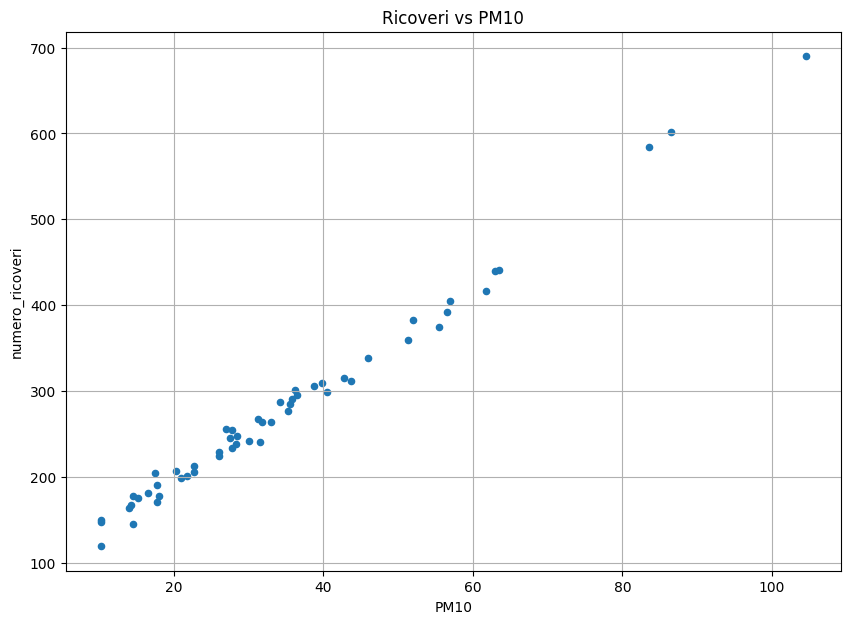

In [124]:
df_confronto_inquinanti.plot(kind='scatter', x='PM10', y='numero_ricoveri', figsize=(10, 7), title='Ricoveri vs PM10', grid=True)

In [125]:
# Raggruppo inquinante PM10 per zona e data applicando una media sui valori
df_pm10_zona = df_inquinanti[df_inquinanti['inquinante'] == 'PM10'].groupby(['data', 'zona'])['valore'].mean().reset_index()

# Raggruppo ricoveri per zona e data sommando i valori dei ricoveri
df_ricoveri_zona = df_respiratori.groupby(['data', 'zona'])['numero_ricoveri'].sum().reset_index()



In [126]:
# Effettuo un merge per zona e data
df_confronto_zona = pd.merge(df_pm10_zona, df_ricoveri_zona, on=['data', 'zona'], how='inner')



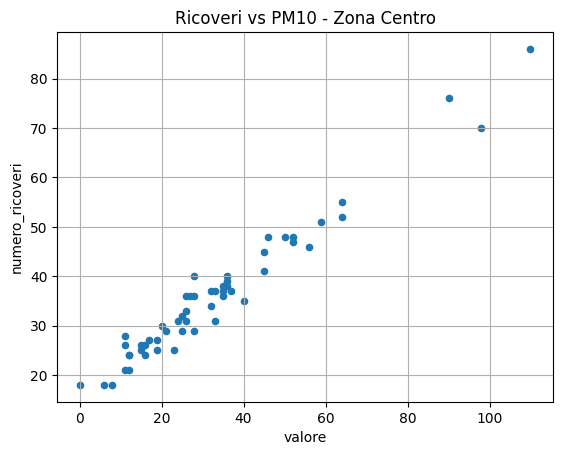

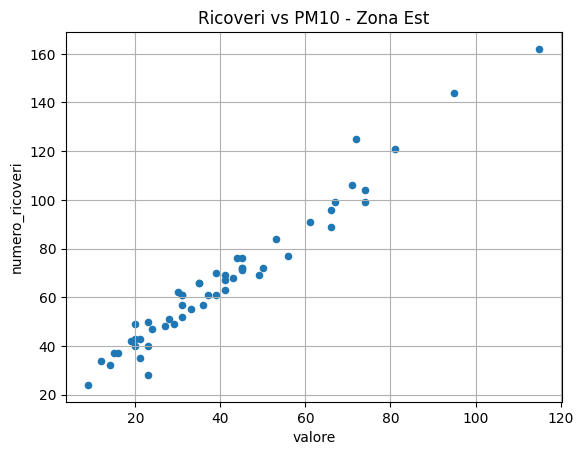

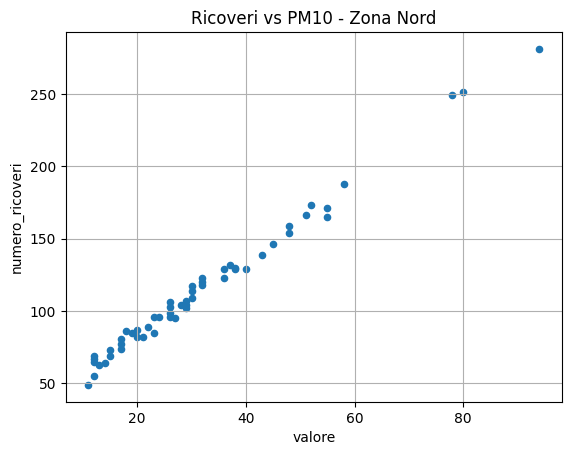

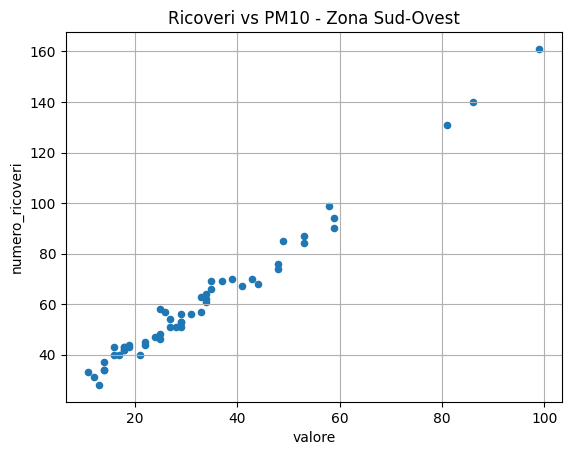

In [127]:
# Scatter plot per ogni zona per il solo inquinante PM10
for zona in df_confronto_zona['zona'].unique():
    df_z = df_confronto_zona[df_confronto_zona['zona'] == zona]
    df_z.plot(kind='scatter', x='valore', y='numero_ricoveri', title=f'Ricoveri vs PM10 - Zona {zona}', grid=True)

I grafici dello scatter già evidenziano una correlazione tra i valori superati degli inquinanti e il valore dei ricoveri per problemi respiratori, un ulteriore verifica a livello statistico la possiamo ottenere applicando il coifficiente di Pearson, utilizzo la libreria Seaborn più adatta per applicazioni statistiche e che visivamente fornisce più elementi grafici e la parte statistica con la libreria "stats"

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#di': Expected package name at the start of dependency specifier
    #di
    ^


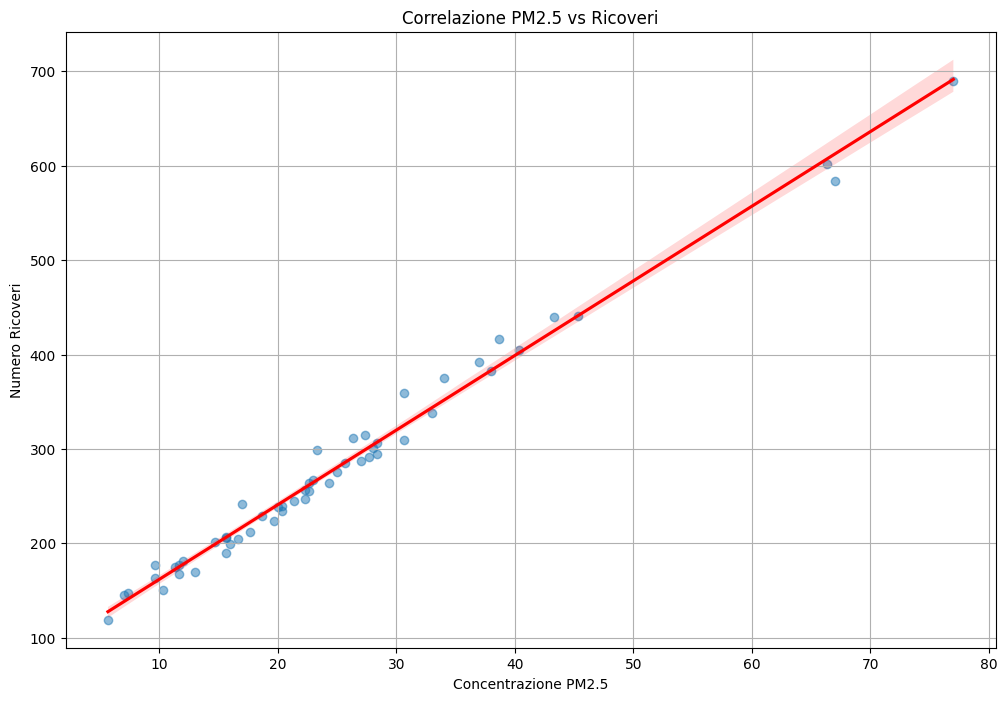

In [128]:
import seaborn as sns  # Importo la libreria per visualizzazioni statistiche
import sys
!{sys.executable} -m pip install scipy #di default non è installata la libreria scipy
from scipy import stats # Importo la libreria per calcoli statistici

plt.figure(figsize=(12, 8))  # Imposta dimensioni del grafico

sns.regplot(
    data=df_confronto_inquinanti,  # DataFrame con i dati
    x='PM25',                      # Variabile X (inquinante)
    y='numero_ricoveri',           # Variabile Y (ricoveri)
    scatter_kws={'alpha':0.5},     # Trasparenza dei punti
    line_kws={'color': 'red'}      # Colore della linea di regressione
)

# Calcolo correlazione tra PM2.5 e ricoveri utilizzando il coifficiente di Pearson
correlazione = stats.pearsonr(
    df_confronto_inquinanti['PM25'], 
    df_confronto_inquinanti['numero_ricoveri']
)

plt.title(f'Correlazione PM2.5 vs Ricoveri')
plt.xlabel('Concentrazione PM2.5')
plt.ylabel('Numero Ricoveri')
plt.grid(True)
plt.show()

Lo stesso grafico ma questa volta per l'inquinante PM10

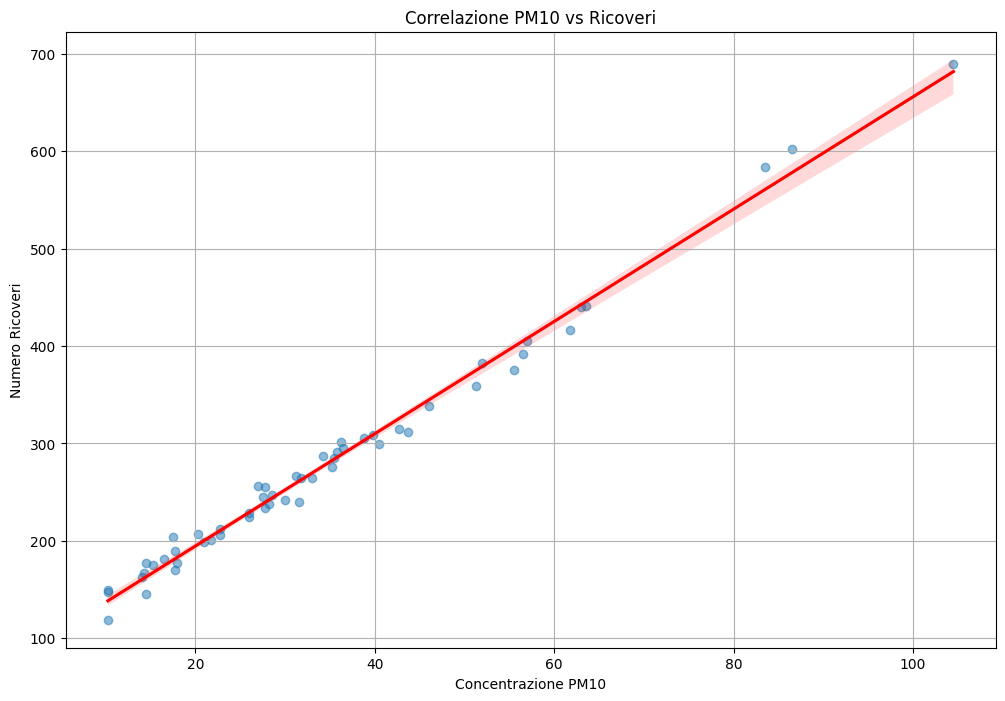

In [129]:
plt.figure(figsize=(12, 8))  # Imposta dimensioni del grafico

sns.regplot(
    data=df_confronto_inquinanti,  # DataFrame con i dati
    x='PM10',                      # Variabile X (inquinante)
    y='numero_ricoveri',           # Variabile Y (ricoveri)
    scatter_kws={'alpha':0.5},     # Trasparenza dei punti
    line_kws={'color': 'red'}      # Colore della linea di regressione
)

# Calcolo correlazione tra PM10 e ricoveri utilizzando il coifficiente di Pearson
correlazione = stats.pearsonr(
    df_confronto_inquinanti['PM10'], 
    df_confronto_inquinanti['numero_ricoveri']
)


plt.title(f'Correlazione PM10 vs Ricoveri')
plt.xlabel('Concentrazione PM10')
plt.ylabel('Numero Ricoveri')
plt.grid(True)
plt.show()

Utilizzando la funzione subplot della libreria plotlib affianco i due grafici confrontare meglio le due visioni.

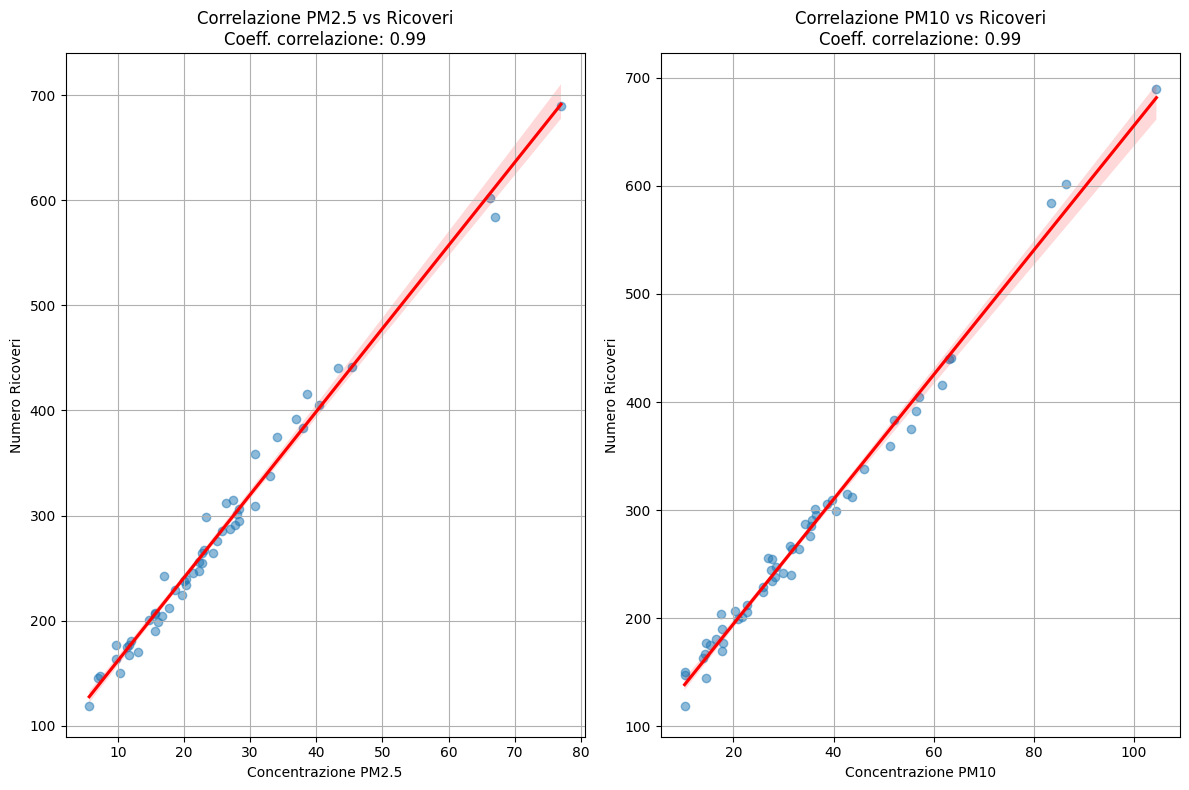

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Primo grafico (PM2.5)
sns.regplot(
    data=df_confronto_inquinanti,
    x='PM25',
    y='numero_ricoveri',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'},
    ax=ax1
)

# Calcolo correlazione PM2.5
correlazione_pm25 = stats.pearsonr(
    df_confronto_inquinanti['PM25'], 
    df_confronto_inquinanti['numero_ricoveri']
)

ax1.set_title(f'Correlazione PM2.5 vs Ricoveri\nCoeff. correlazione: {correlazione_pm25[0]:.2f}')
ax1.set_xlabel('Concentrazione PM2.5')
ax1.set_ylabel('Numero Ricoveri')
ax1.grid(True)

# Secondo grafico (PM10)
sns.regplot(
    data=df_confronto_inquinanti,
    x='PM10',
    y='numero_ricoveri',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'},
    ax=ax2
)

# Calcolo correlazione PM10
correlazione_pm10 = stats.pearsonr(
    df_confronto_inquinanti['PM10'], 
    df_confronto_inquinanti['numero_ricoveri']
)

ax2.set_title(f'Correlazione PM10 vs Ricoveri\nCoeff. correlazione: {correlazione_pm10[0]:.2f}')
ax2.set_xlabel('Concentrazione PM10')
ax2.set_ylabel('Numero Ricoveri')
ax2.grid(True)

# evitare la sovrapposizione
plt.tight_layout()
plt.show()